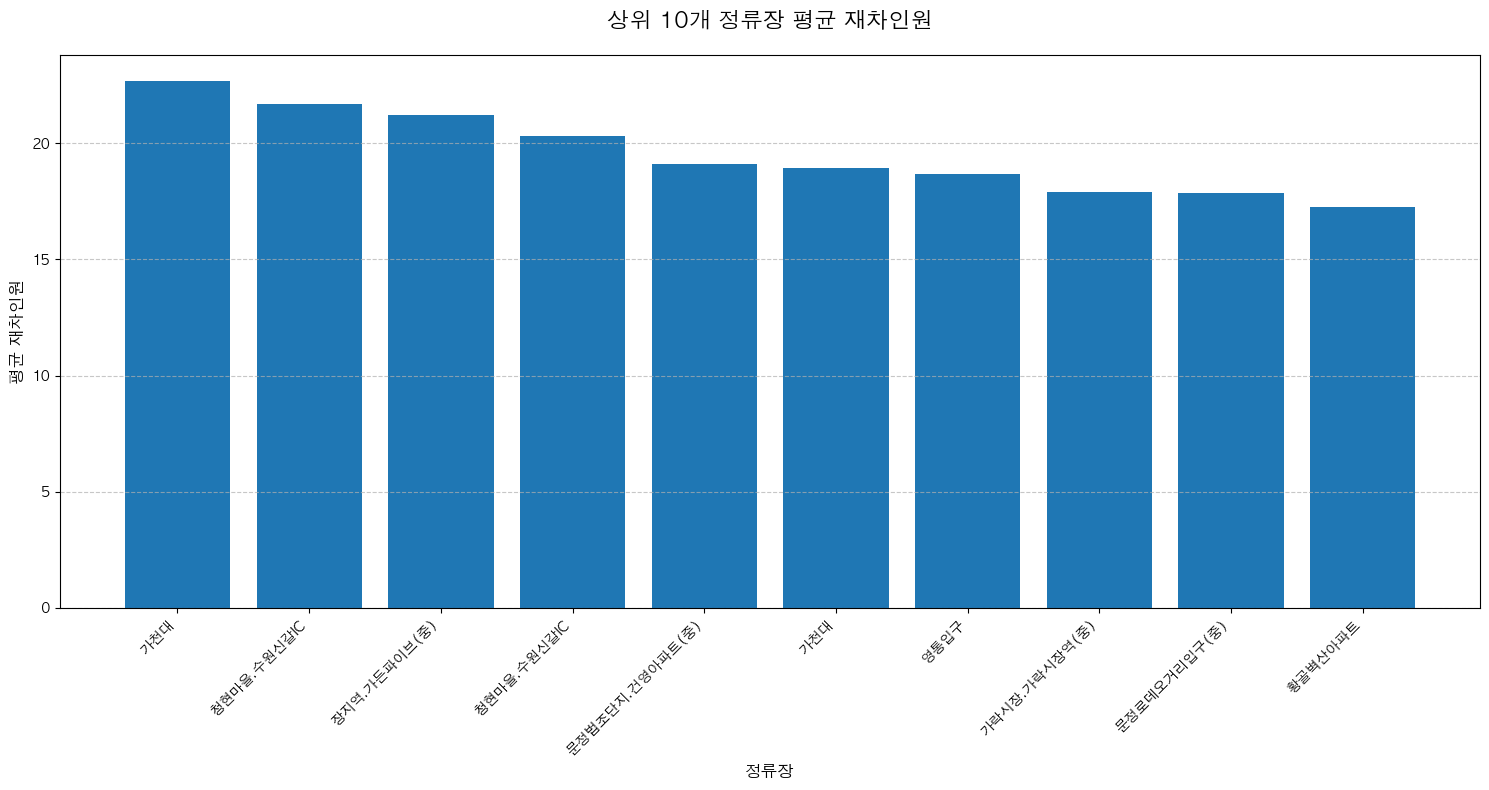


=== 상위 10개 정류장 정보 ===
 정류장순번            정류장명    평균재차인원
    36             가천대 22.673274
    13     청현마을.수원신갈IC 21.705172
    35    장지역.가든파이브(중) 21.219640
    37     청현마을.수원신갈IC 20.316929
    34 문정법조단지.건영아파트(중) 19.103213
    14             가천대 18.926179
    11            영통입구 18.689223
    32   가락시장.가락시장역(중) 17.885851
    33    문정로데오거리입구(중) 17.878332
    10         황골벽산아파트 17.241285

전체 정류장 평균 재차인원: 10.38


In [1]:
### 해당 노선에서, 가장 혼잡한 정류장 시각화. 


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'
train_data = pd.read_csv(os.path.join(base_path, '트레이닝셋_정규화x_이상치제거.csv'))

# 운행 시간대 정의
operating_hours = ['04시','05시','06시','07시','08시','09시','10시','11시','12시', '13시', '14시', '15시', '16시', '17시', 
                  '18시', '19시', '20시', '21시', '22시', '23시', '00시']

# 정류장별 평균 재차인원 계산
station_avg = train_data.groupby(['정류장순번', '정류장명'])[operating_hours].mean().mean(axis=1).reset_index()
station_avg.columns = ['정류장순번', '정류장명', '평균재차인원']

# 상위 10개 정류장 선택
top_10_stations = station_avg.nlargest(10, '평균재차인원')

# 시각화
plt.figure(figsize=(15, 8))
bars = plt.bar(range(len(top_10_stations)), top_10_stations['평균재차인원'])

# 바 위에 값 표시
# for i, bar in enumerate(bars):
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2., height,
#              f'순번: {top_10_stations.iloc[i]["정류장순번"]}\n{height:.2f}',
#              ha='center', va='bottom')

# 그래프 스타일링
plt.title('상위 10개 정류장 평균 재차인원', fontsize=16, pad=20)
plt.xlabel('정류장', fontsize=12)
plt.ylabel('평균 재차인원', fontsize=12)
plt.xticks(range(len(top_10_stations)), 
           top_10_stations['정류장명'], 
           rotation=45, 
           ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 상위 10개 정류장 정보 출력
print("\n=== 상위 10개 정류장 정보 ===")
print(top_10_stations.to_string(index=False))

# 참고로 전체 평균도 출력
print(f"\n전체 정류장 평균 재차인원: {station_avg['평균재차인원'].mean():.2f}")

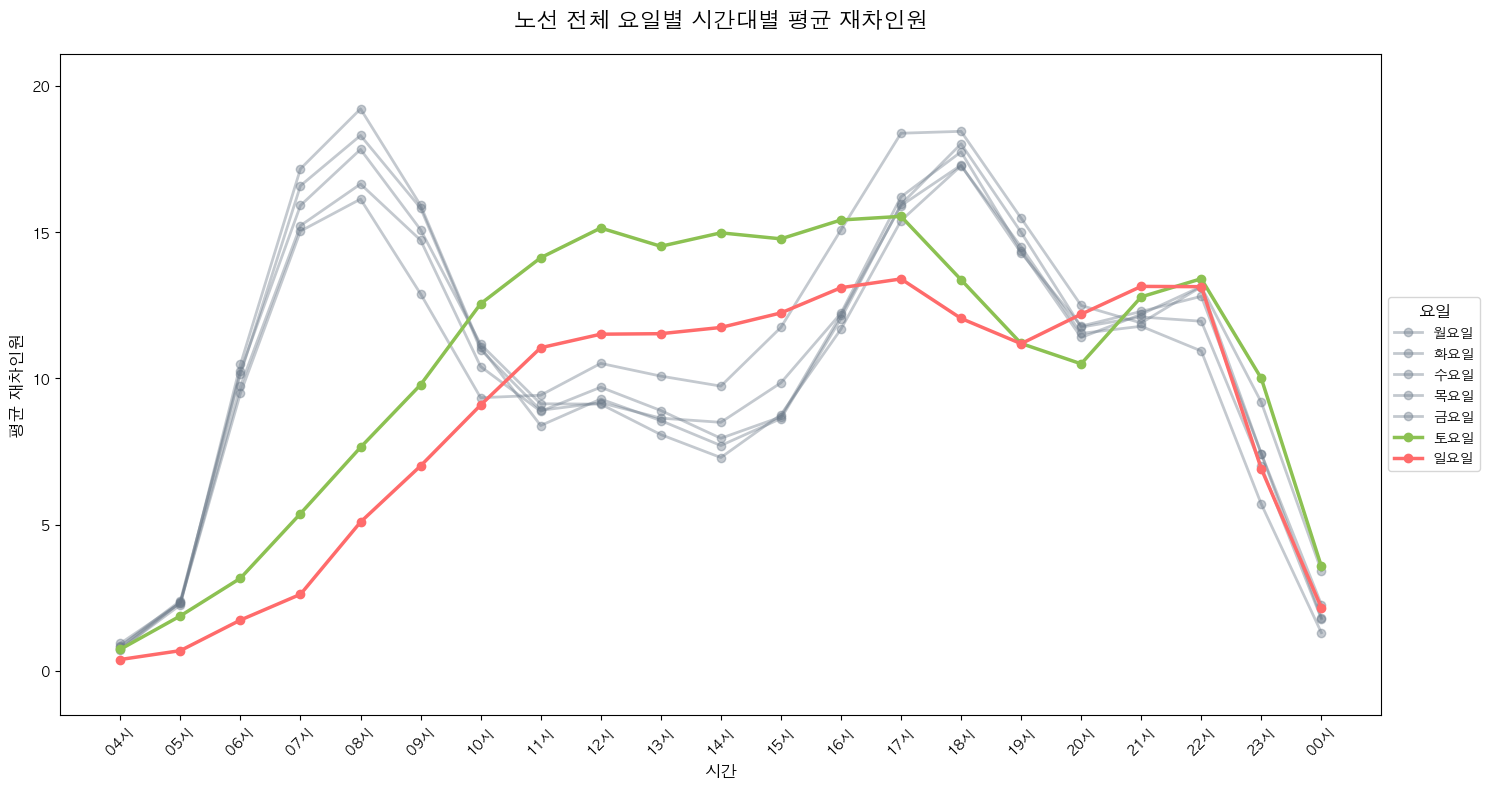


=== 평일/주말 비교 ===
평일 평균 재차인원: 10.69
주말 평균 재차인원: 9.58
차이 (주말 - 평일): -1.11
차이 비율: -10.4%


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'
train_data = pd.read_csv(os.path.join(base_path, '트레이닝셋_정규화x_이상치제거.csv'))

# 운행 시간대 정의
operating_hours = ['04시','05시','06시','07시','08시','09시','10시','11시','12시', '13시', '14시', '15시', '16시', '17시', 
                  '18시', '19시', '20시', '21시', '22시', '23시', '00시']

# 요일별 전체 정류장 평균 재차인원 계산
daily_means = train_data.groupby('요일')[operating_hours].mean()

# 요일 순서 정의
day_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
daily_means = daily_means.reindex(day_order)

# 시각화
plt.figure(figsize=(15, 8))

# 요일별 색상 정의
colors = {
   '월요일': '#6C7A89',  # 파랑
   '화요일': '#6C7A89',
   '수요일': '#6C7A89',
   '목요일': '#6C7A89',
   '금요일': '#6C7A89',
   '토요일': '#8CC152',  # 연두
   '일요일': '#FF6B6B'   # 빨강
}

alphas = {
   '월요일': 0.4,
   '화요일': 0.4,
   '수요일': 0.4,
   '목요일': 0.4,
   '금요일': 0.4,
   '토요일': 1.0,
   '일요일': 1.0
}

linewidths = {
   '월요일': 2,
   '화요일': 2,
   '수요일': 2,
   '목요일': 2,
   '금요일': 2,
   '토요일': 2.5,
   '일요일': 2.5
}

# 요일별 그래프 그리기
for day in day_order:
   plt.plot(operating_hours, daily_means.loc[day], 
           label=day, 
           color=colors[day], 
           marker='o', 
           markersize=6,
           alpha=alphas[day], 
           linewidth=linewidths[day])

plt.title('노선 전체 요일별 시간대별 평균 재차인원', fontsize=16, pad=20)
plt.xlabel('시간', fontsize=12)
plt.ylabel('평균 재차인원', fontsize=12)
plt.grid(False)  # 그리드 제거
plt.legend(title='요일', title_fontsize=12, fontsize=10, 
         loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45)

# y축 범위 설정 (여백 추가)
ymin = daily_means.values.min()
ymax = daily_means.values.max()
margin = (ymax - ymin) * 0.1
plt.ylim(ymin - margin, ymax + margin)

plt.tight_layout()
plt.show()

# 평일과 주말의 차이 출력
weekday_mean = daily_means.iloc[:5].mean().mean()  # 평일 전체 평균
weekend_mean = daily_means.iloc[5:].mean().mean()  # 주말 전체 평균

print("\n=== 평일/주말 비교 ===")
print(f"평일 평균 재차인원: {weekday_mean:.2f}")
print(f"주말 평균 재차인원: {weekend_mean:.2f}")
print(f"차이 (주말 - 평일): {weekend_mean - weekday_mean:.2f}")
print(f"차이 비율: {((weekend_mean - weekday_mean) / weekday_mean * 100):.1f}%")

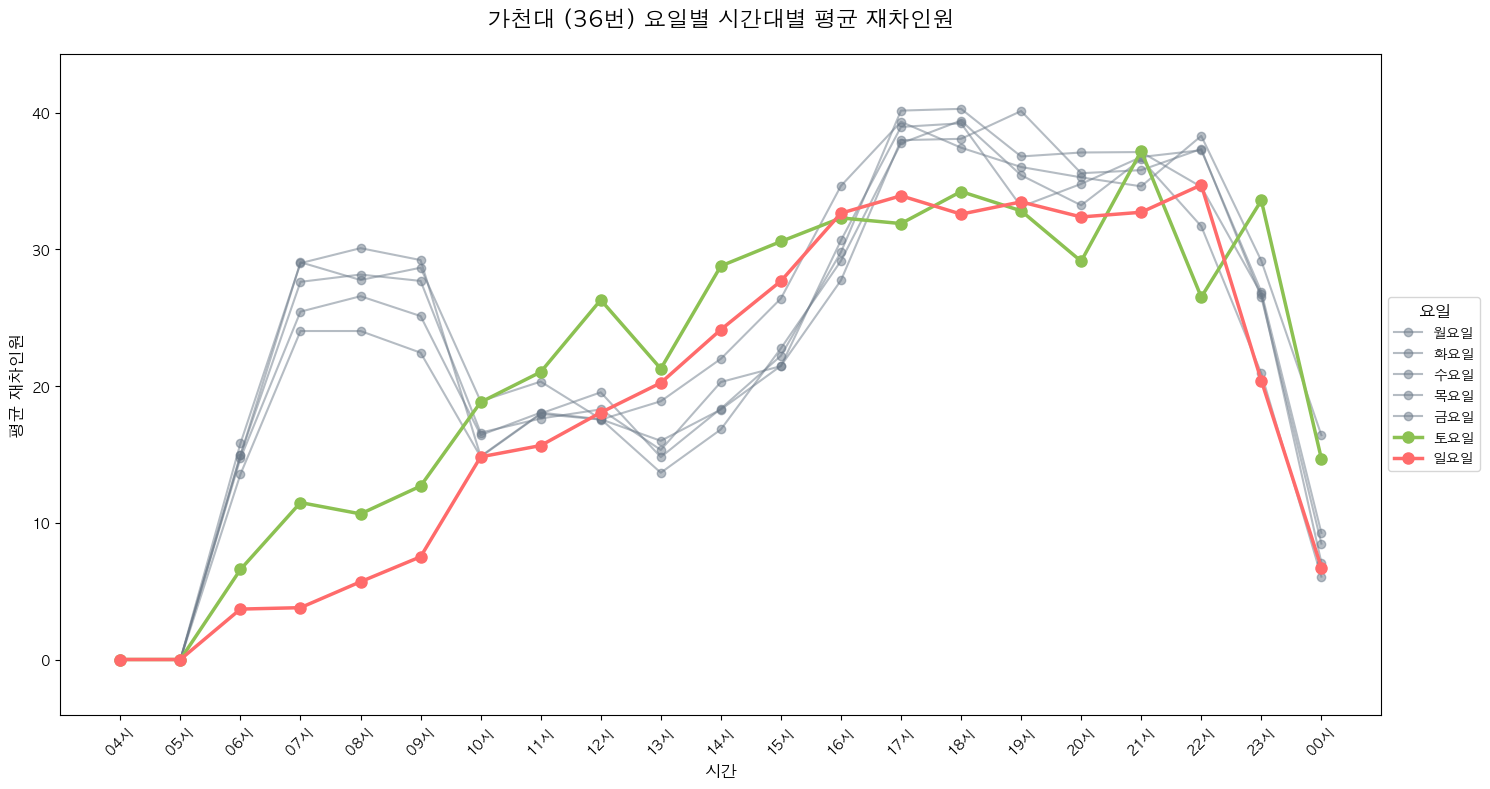


=== 가천대 평일/주말 비교 ===
평일 평균 재차인원: 23.51
주말 평균 재차인원: 20.51
차이 (주말 - 평일): -2.99
차이 비율: -12.7%


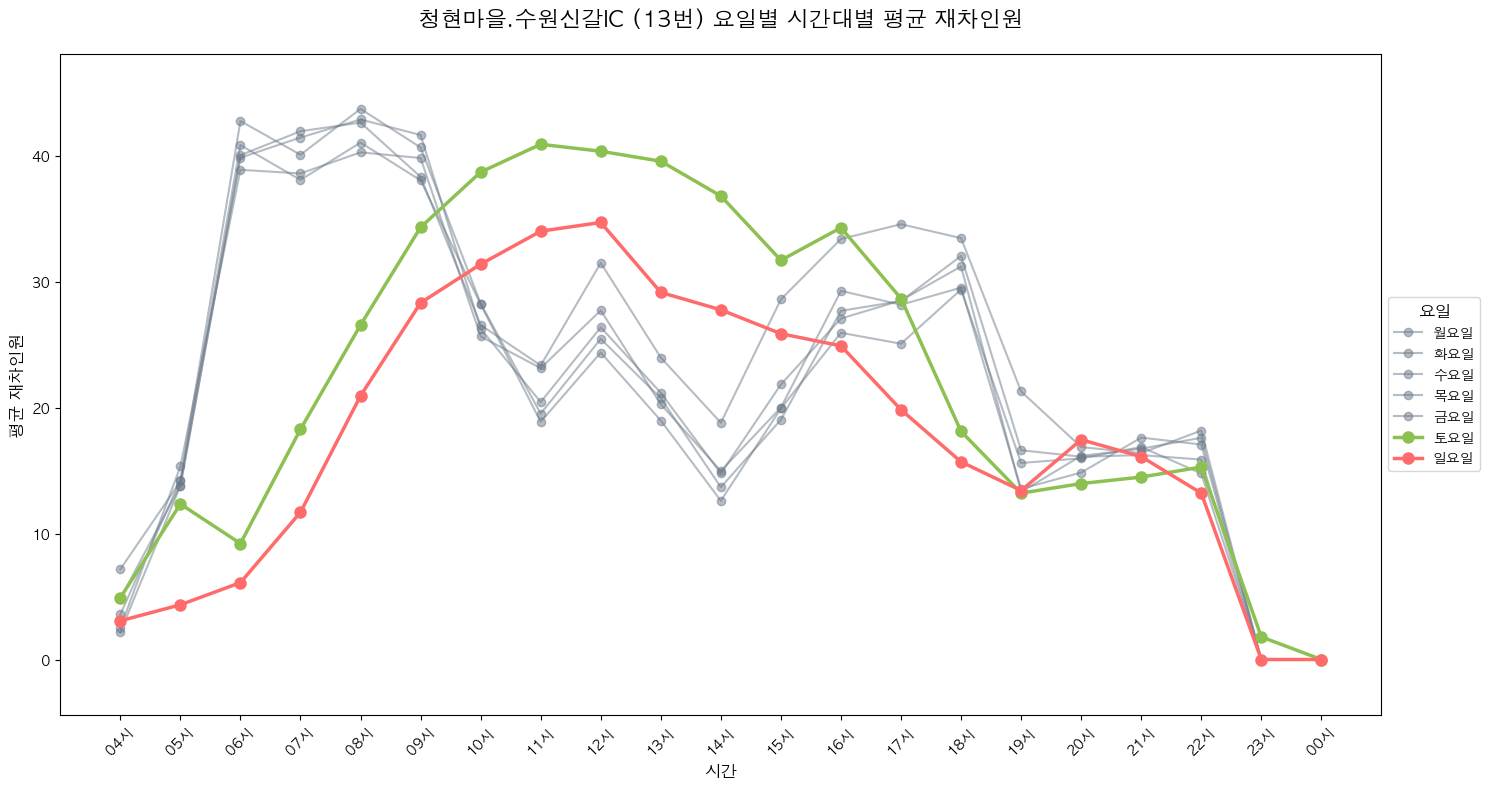


=== 청현마을.수원신갈IC 평일/주말 비교 ===
평일 평균 재차인원: 22.28
주말 평균 재차인원: 20.27
차이 (주말 - 평일): -2.01
차이 비율: -9.0%


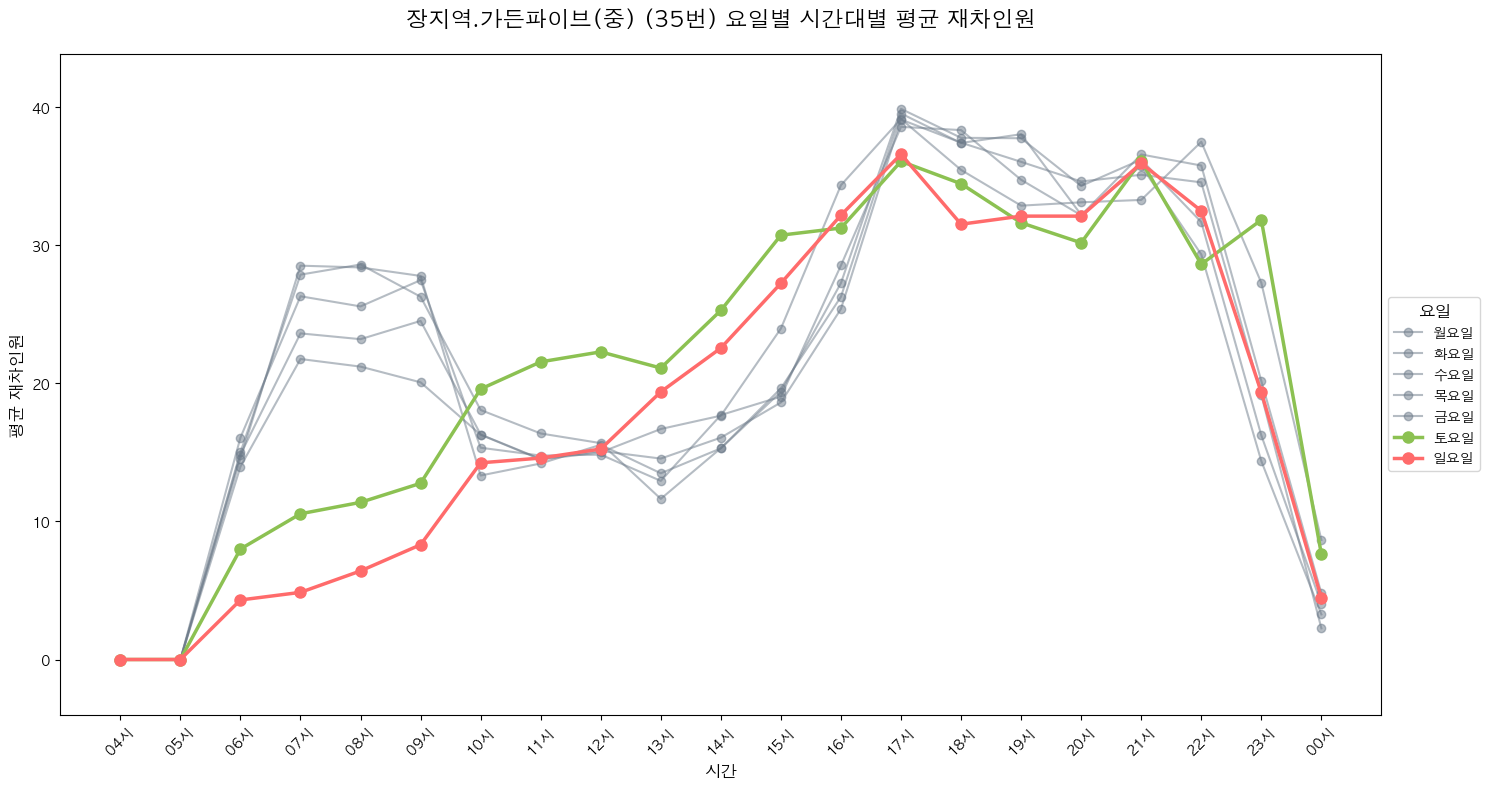


=== 장지역.가든파이브(중) 평일/주말 비교 ===
평일 평균 재차인원: 21.65
주말 평균 재차인원: 20.11
차이 (주말 - 평일): -1.54
차이 비율: -7.1%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 읽기
base_path = '/Users/foxrainswap/Desktop/데이터/재차인원/1112/합본'
train_data = pd.read_csv(os.path.join(base_path, '트레이닝셋_정규화x_이상치제거.csv'))

# 운행 시간대 정의
operating_hours = ['04시','05시','06시','07시','08시','09시','10시','11시','12시', '13시', '14시', '15시', '16시', '17시', 
                  '18시', '19시', '20시', '21시', '22시', '23시', '00시']
# 상위 정류장 찾기
station_avg = train_data.groupby(['정류장순번', '정류장명'])[operating_hours].mean().mean(axis=1).reset_index()
station_avg.columns = ['정류장순번', '정류장명', '평균재차인원']
top_stations = station_avg.nlargest(3, '평균재차인원')

def plot_station_pattern(station_id, station_name):
   # 해당 정류장 데이터 필터링
   station_data = train_data[train_data['정류장순번'] == station_id].copy()
   
   # 요일별 평균 재차인원 계산
   daily_means = station_data.groupby('요일')[operating_hours].mean()
   
   # 요일 순서 정의
   day_order = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
   daily_means = daily_means.reindex(day_order)
   
   # 색상 정의
   colors = {
       '월요일': '#6C7A89',  # 회색
       '화요일': '#6C7A89',
       '수요일': '#6C7A89',
       '목요일': '#6C7A89',
       '금요일': '#6C7A89',
       '토요일': '#8CC152',  
       '일요일': '#FF6B6B'   # 빨강
   }
   
   alphas = {
       '월요일': 0.5,
       '화요일': 0.5,
       '수요일': 0.5,
       '목요일': 0.5,
       '금요일': 0.5,
       '토요일': 1.0,
       '일요일': 1.0
   }

   linewidths = {
       '월요일': 1.5,
       '화요일': 1.5,
       '수요일': 1.5,
       '목요일': 1.5,
       '금요일': 1.5,
       '토요일': 2.5,
       '일요일': 2.5
   }
   
   # 시각화
   plt.figure(figsize=(15, 8))
   
   # 평일을 먼저 그리고 토,일요일을 나중에 그려서 더 잘 보이게 함
   weekdays = ['월요일', '화요일', '수요일', '목요일', '금요일']
   weekends = ['토요일', '일요일']
   
   # 평일 먼저 그리기
   for day in weekdays:
       plt.plot(operating_hours, daily_means.loc[day], 
               label=day, 
               color=colors[day], 
               marker='o', 
               markersize=6,
               alpha=alphas[day], 
               linewidth=linewidths[day])
   
   # 주말 나중에 그리기
   for day in weekends:
       plt.plot(operating_hours, daily_means.loc[day], 
               label=day, 
               color=colors[day], 
               marker='o', 
               markersize=8,
               alpha=alphas[day], 
               linewidth=linewidths[day])
   
   plt.title(f'{station_name} ({station_id}번) 요일별 시간대별 평균 재차인원', fontsize=16, pad=20)
   plt.xlabel('시간', fontsize=12)
   plt.ylabel('평균 재차인원', fontsize=12)
   plt.grid(False)  # 그리드 제거
   plt.legend(title='요일', title_fontsize=12, fontsize=10, 
             loc='center left', bbox_to_anchor=(1, 0.5))
   plt.xticks(rotation=45)
   
   # y축 범위 설정 (여백 추가)
   ymin = daily_means.values.min()
   ymax = daily_means.values.max()
   margin = (ymax - ymin) * 0.1
   plt.ylim(ymin - margin, ymax + margin)
   
   plt.tight_layout()
   plt.show()
   
   # 평일과 주말의 차이 출력
   weekday_mean = daily_means.iloc[:5].mean().mean()  # 평일 전체 평균
   weekend_mean = daily_means.iloc[5:].mean().mean()  # 주말 전체 평균
   
   print(f"\n=== {station_name} 평일/주말 비교 ===")
   print(f"평일 평균 재차인원: {weekday_mean:.2f}")
   print(f"주말 평균 재차인원: {weekend_mean:.2f}")
   print(f"차이 (주말 - 평일): {weekend_mean - weekday_mean:.2f}")
   print(f"차이 비율: {((weekend_mean - weekday_mean) / weekday_mean * 100):.1f}%")

# 상위 3개 정류장에 대해 시각화 수행
for _, row in top_stations.iterrows():
   plot_station_pattern(row['정류장순번'], row['정류장명'])